In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/vdata.csv')

In [3]:
df.head

<bound method NDFrame.head of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_ann

In [4]:
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df['authorities_contacted']

0      Police
1      Police
2      Police
3      Police
4         NaN
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

In [9]:
x = df[['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day',  'number_of_vehicles_involved',  'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
         'vehicle_claim', 'auto_year']]
y = df['total_claim_amount']

In [10]:
x.shape

(1000, 15)

In [11]:
y.shape

(1000,)

In [12]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x_train.shape

(800, 15)

In [14]:
x_test.shape

(200, 15)

In [15]:
model = LinearRegression().fit(x_train, y_train)


In [16]:
model

LinearRegression()

In [17]:
print(model.coef_)
print(model.intercept_)

[-2.87774593e-12  3.89609456e-11 -1.69088971e-15  1.63354714e-15
 -6.31999876e-17  2.95725353e-16 -4.13301736e-16  2.51813983e-13
 -1.02590221e-12  4.42051716e-13  5.42794769e-13  1.00000000e+00
  1.00000000e+00  1.00000000e+00  8.22996036e-14]
-1.1059455573558807e-09


In [18]:
predicted = model.predict(x_test)
print(predicted)

[ 88110.  52800.  67600.  62800.   6820.  69300.  72840.  53730.  48950.
   3690.   4680.  89400.   5490.  49100.  68240.   4700.  46560.  34160.
  68200.  74280.  67210.   6100.  44110.   2700.   6120.  76560.  52800.
  77000.  60000.  43560.  39480.  73560.  34650.  73370.  52560.  59400.
  95900.   6030.  40500.  62920.  51810.  72930.  35000.  98280.  63720.
  60390.  32670.  64080.   5900.   5940.  36400.  58560.  59000.  51090.
  98160.  75600.  40600.  87010.  28100.   7200.  77100.   2640.  48070.
   8800.  71640.   6600.  53460.  63900.  68310.  51030.  74200.  66950.
  64260.  40800.  52700.   8760.  68750.  60170.  65100.  59100.  32480.
  89700.  37530.  33930.  31700.   8640.  46980.  64350.  41490.  65780.
  49950.  56000.  47740.  70290.  28440.  41850.  70290.   4700.  68520.
  53100.  49900.  35900.  53400.  50500.   2860.  53460.  41700.   3300.
   5940.  62640.  75960.  76400.  76900.  60170.  68400.  55170.  54900.
  84590.  62590.  53400.   2640.  66880.  50380.   

In [19]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predicted.flatten()})

In [20]:
df1

,Actual,Predicted
0,88110,88110.0
1,52800,52800.0
2,67600,67600.0
3,62800,62800.0
4,6820,6820.0
...,...,...
195,43230,43230.0
196,5640,5640.0
197,65070,65070.0
198,79560,79560.0


<Axes: >

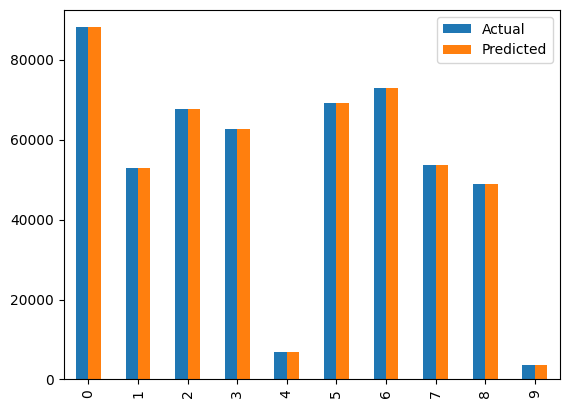

In [21]:
graph  = df1.head(10)
graph.plot(kind='bar')

In [22]:
model.score(x_train, y_train)

1.0

In [23]:
model.score(x_test, y_test)

1.0

In [ ]:
import numpy as np
print("Enter the following 15 values:")
feature_names = [
    "months_as_customer", "age", "policy_deductable", "policy_annual_premium", "umbrella_limit",
    "incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", "witnesses",
    "capital-gains", "capital-loss", "injury_claim", "property_claim", "vehicle_claim", "auto_year"
]
user_input = []
for feature in feature_names:
    value = float(input(f"Enter {feature}: "))  
    user_input.append(value)
new_input = np.array(user_input).reshape(1, -1)
prediction = model.predict(new_input)
print("\nPredicted Total Claim Amount:", round(prediction[0], 2))

Enter the following 15 values:

Predicted Total Claim Amount: 255000.0


c:\Users\avinash\Downloads\my projects\machine learning projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
